In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

# Ödev1 
Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [5]:
öğrenci_performans = pd.read_csv("StudentsPerformance.csv")
öğrenci_performans.columns=['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
öğrenci_performans.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


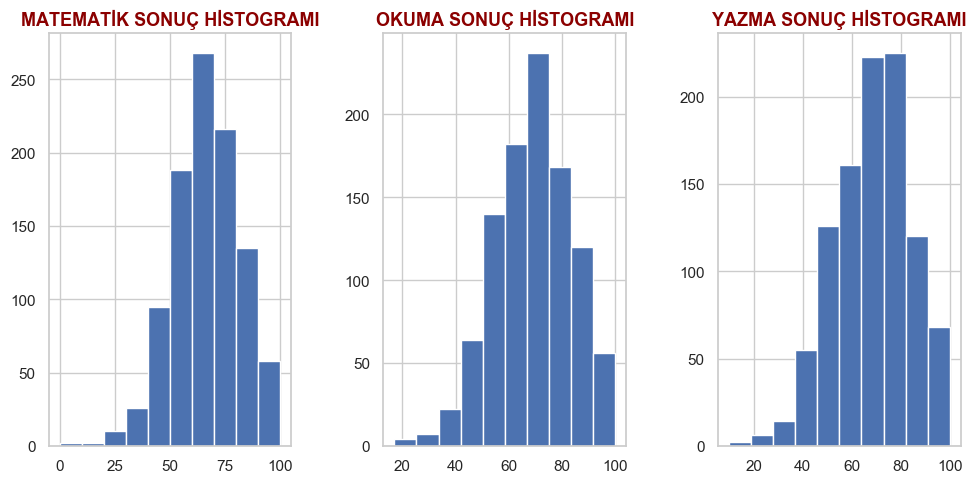

In [34]:

plt.rcParams["figure.dpi"]=100
plt.rcParams["figure.figsize"]=(10,5)

plt.subplot(1,3,1)
plt.title("MATEMATİK SONUÇ HİSTOGRAMI",fontdict=baslik_font)
plt.hist(öğrenci_performans["matematik_notu"])

plt.subplot(1,3,2)
plt.title("OKUMA SONUÇ HİSTOGRAMI",fontdict=baslik_font)
plt.hist(öğrenci_performans["okuma_notu"])

plt.subplot(1,3,3)
plt.title("YAZMA SONUÇ HİSTOGRAMI",fontdict=baslik_font)
plt.hist(öğrenci_performans["yazma_notu"])

plt.tight_layout()
plt.show()

# Ödev2
Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [19]:
pd.Hedef=(öğrenci_performans["matematik_notu"]+öğrenci_performans["okuma_notu"]+öğrenci_performans["yazma_notu"])/3

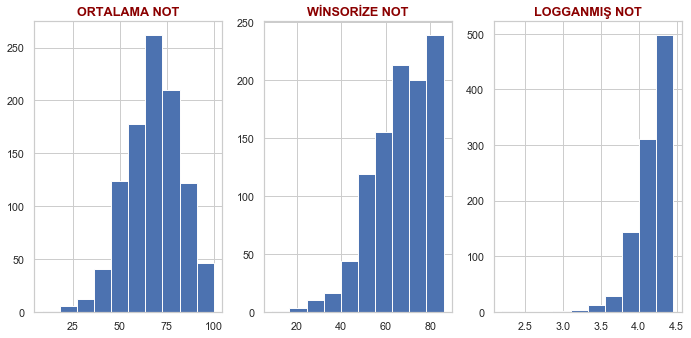

In [25]:
plt.subplot(1,3,1)
plt.title("ORTALAMA NOT",fontdict=baslik_font)
plt.hist(Hedef)

plt.subplot(1,3,2)
plt.title("WİNSORİZE NOT",fontdict=baslik_font)
winsorize_hedef=winsorize(Hedef,(0,0.10))
plt.hist(winsorize_hedef)

plt.subplot(1,3,3)
plt.title("LOGLANMIŞ NOT",fontdict=baslik_font)
plt.hist(np.log(winsorize_hedef))

plt.tight_layout()
plt.show()

In [ ]:
GÖrüldüğü üzere notların işlem yapılmamış ortalamaları normal dağılıma daha yakın bi görüntü vermektedir.


# Ödev3 
Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [28]:
 öğrenci_performans.corr()


,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000000,0.817580,0.802642
okuma_notu,0.817580,1.000000,0.954598
yazma_notu,0.802642,0.954598,1.000000


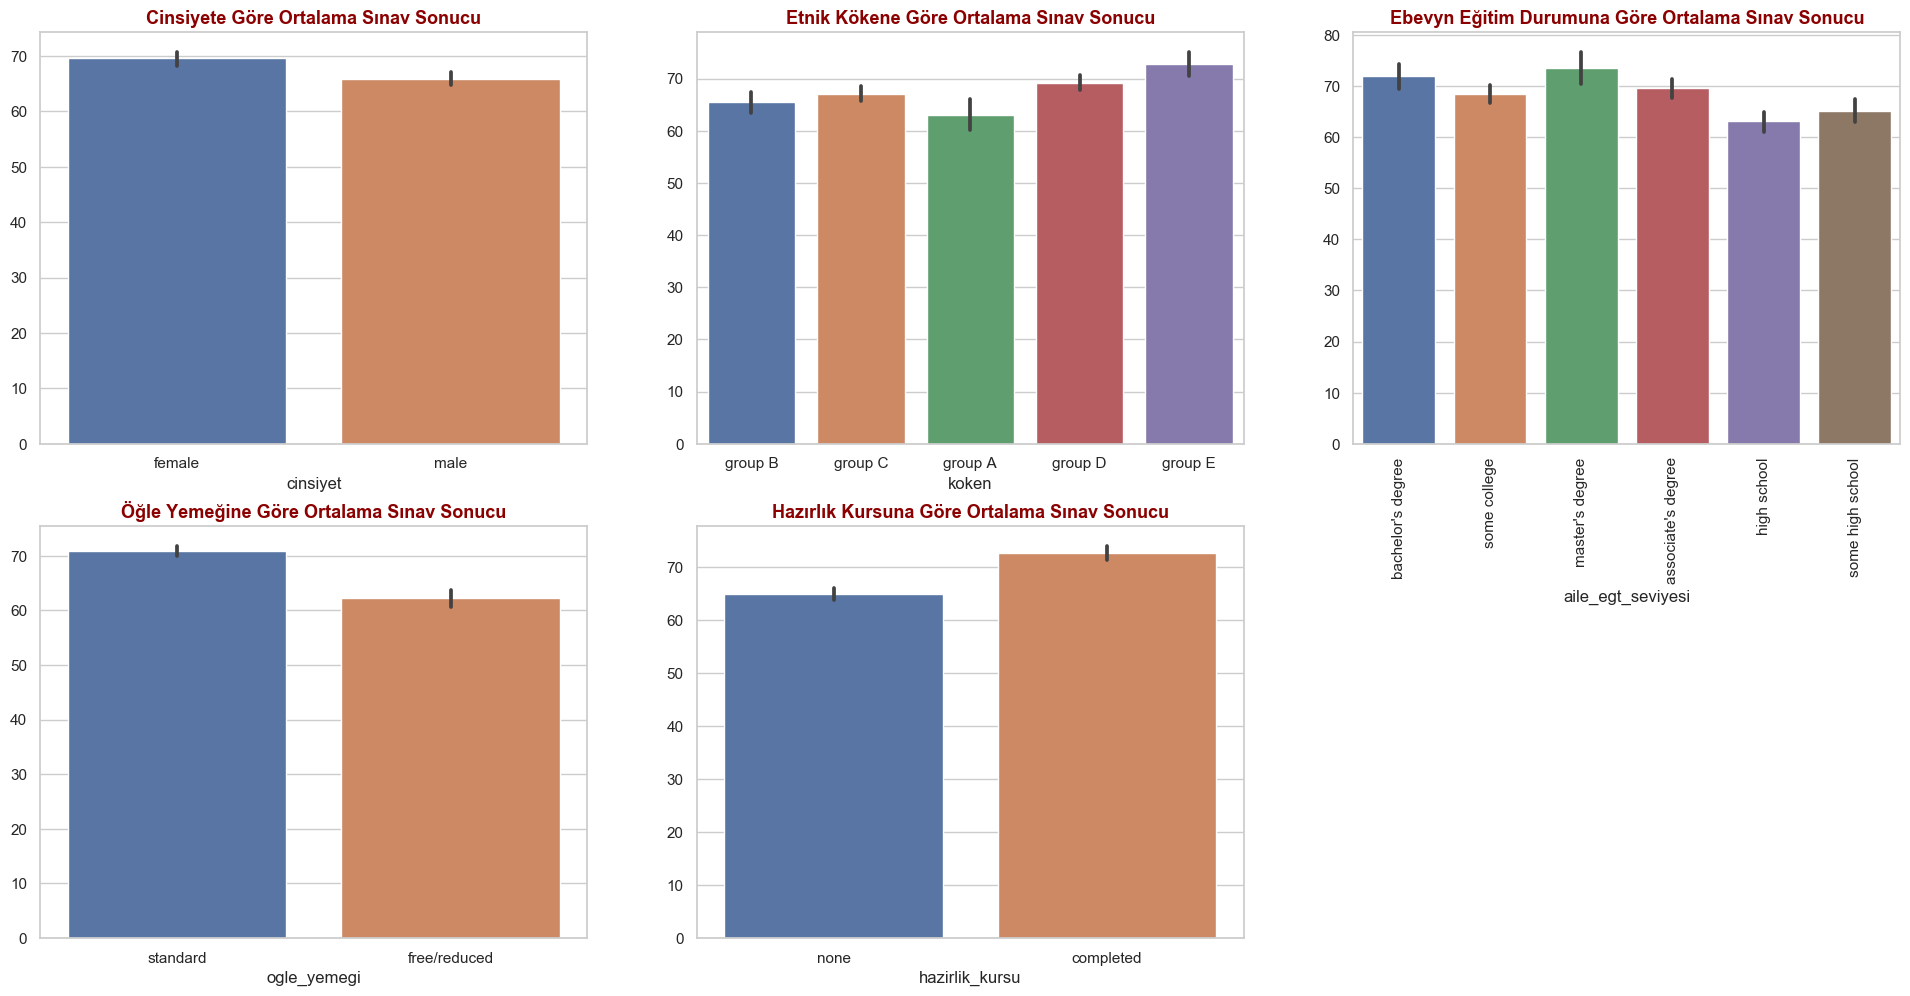

In [39]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
sns.barplot(öğrenci_performans["cinsiyet"], Hedef)
plt.title("Cinsiyete Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(2,3,2)
sns.barplot(öğrenci_performans["koken"], Hedef)
plt.title("Etnik Kökene Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(2,3,3)
chart=sns.barplot(öğrenci_performans["aile_egt_seviyesi"], Hedef)
plt.title("Ebevyn Eğitim Durumuna Göre Ortalama Sınav Sonucu", fontdict = baslik_font )
plt.xticks(rotation="vertical")

plt.subplot(2,3,4)
sns.barplot(öğrenci_performans["ogle_yemegi"], Hedef)
plt.title("Öğle Yemeğine Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(2,3,5)
sns.barplot(öğrenci_performans["hazirlik_kursu"], Hedef)
plt.title("Hazırlık Kursuna Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.show()

Hedef değişkeni tüm değişkenler ile korelasyona sahiptir. Ancak cinsiyet ve öğle yemeği değişkenlerinde gruplar arası fark az olduğundan birleştirilebilir.